<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/Titanic/1_1_titanic_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle 필사     
원본 : https://kaggle-kr.tistory.com/17?category=868316

In [ ]:
# kaggle json
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 50.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.81MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 18.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 스타일 지정

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 프로세스
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어있다. 가끔 null이 있는데 확인후 수정해야한다
2. 탐색적 데이터분석(exploratory data analysis)EDA - 여러 feature 들 간의 상관관계를 확인한다. 여러 시각화 툴을 사용하여 insight를 얻는다
3.feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 한다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 ㅈ처리 등을 한다.
4. model만들기 - sklearn 을 사용해 모델을 만든다. 파이썬에서 머신러닝을 할 때는 sklearn을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있다.
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset을 가지고 prediction 한다
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단한다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라진다. 학습된 모델이 어떤 것을 학습하였는지 확인해 본다.

## 1. Dataset 확인
* 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화되어 있으며, 많이 쓰이는 라이브러리는 pandas
* pandas를 사용하여 데이터셋의 간단한 통계적 분석 부터, 복잡한 처리들을 간단한 메소들를 사용하여 해낼 수 있다.
* 파이썬으로 데이터 분석을 한다고하면 반드시 능숙해져야 할 라이브러리
* 캐글의 데이터셋은 보통 trian, testset으로 나누어진다

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare이며 예측하려는 target label은 Survived이다

pandas dataframe 에는 describe() 메소드가 있는데, 이를쓰면 각 feature가 가진 통계치들을 반환해준다

In [ ]:
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Carter, Master. William Thornton II",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


테이블에서 보다시피, Passenser ID숫자와 다른, 그러니까 nulldata가 존재하는 열(feature)가 있는것 같다     
이를 좀 더 보기 편하도록 그래프로 시각화 해보겠다

### 1-1. Null data check

In [ ]:
for col in df_train.columns:
  msg = 'column: {:>10}\t percent of NaN value: {:.2f}%'.format(col, 100* (df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column: PassengerId	 percent of NaN value: 0.00%
column:   Survived	 percent of NaN value: 0.00%
column:     Pclass	 percent of NaN value: 0.00%
column:       Name	 percent of NaN value: 0.00%
column:        Sex	 percent of NaN value: 0.00%
column:        Age	 percent of NaN value: 19.87%
column:      SibSp	 percent of NaN value: 0.00%
column:      Parch	 percent of NaN value: 0.00%
column:     Ticket	 percent of NaN value: 0.00%
column:       Fare	 percent of NaN value: 0.00%
column:      Cabin	 percent of NaN value: 77.10%
column:   Embarked	 percent of NaN value: 0.22%


In [ ]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


train, test둘다 Age(20%), Cabin(80%), Embarked(train 0.22%) null data가 존재한다

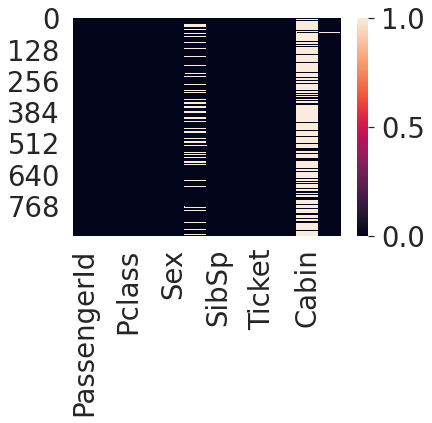

In [ ]:
sns.heatmap(df_train.isnull(), cbar='False')

MANO 라는 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼수 있다.

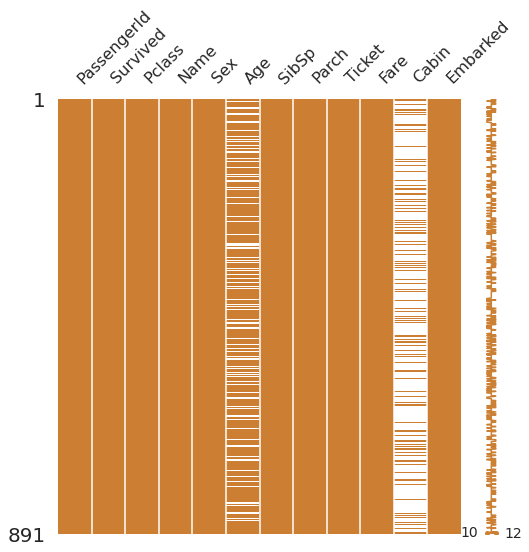

In [ ]:
import missingno as msno
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

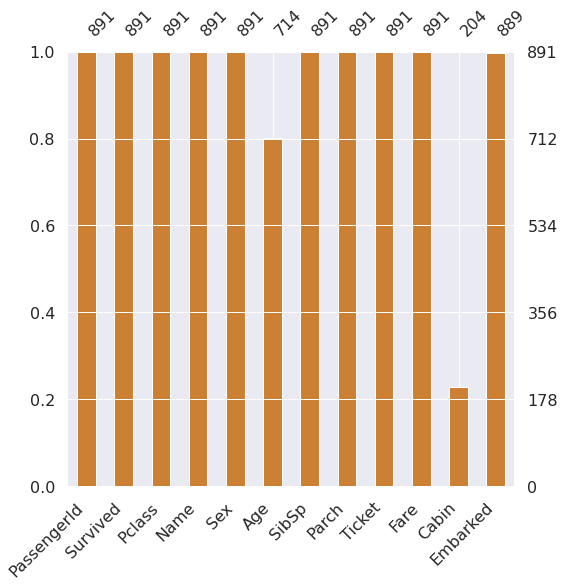

In [ ]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

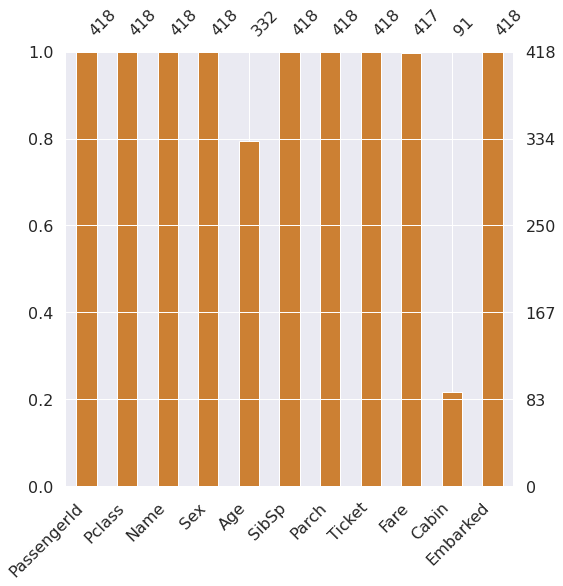

In [ ]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1-2. Target label 확인
* target label이 어떤 distribution을 가지고 있는 지 확인해봐야합니다
* 지금같은 binary classificantion문제의 경우에서 1과0의 분포가 어더냐에 따라 모델의 평가방법이 달라질 수있다

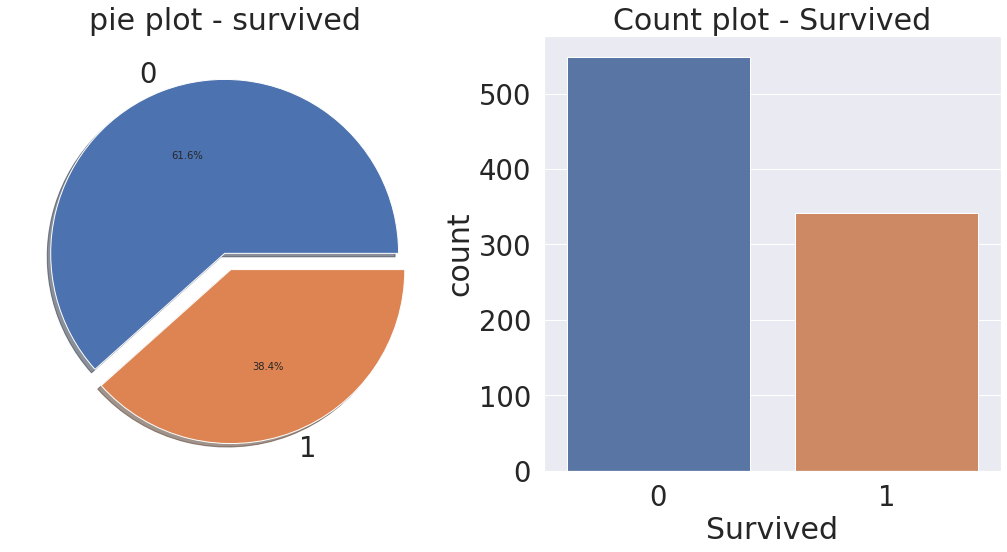

In [ ]:
f, ax = plt.subplots(1, 2, figsize =(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('pie plot - survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 안타깝게도 죽은 사람이 많다      
* 38.4%가 살아남았다      
* target label의 분포가 제법 균일하다. 편파적인 분포라면 다른전략을 짜야한다


## 2. Exploratory data analysis(EDA)
* 이제 본격적으로 데이터 분석을 해보겠다. 데이터는 매우많다. 이 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요하다
* 시각화 라이브러리는 matplotlib, seaborn, plotly등이있다. 

### 2.1 Pclass
먼저 Pclass 에 대해서 살펴보겠다. Pclass는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터이다       
먼저 Pclass에 따른 생존률의 차이를 살펴보겠다. 엑셀의 피벗 차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 할 수있다. 또한 pivot이라는 메소드도있다.      
Pclass, Survived 를 가져온 후 Pclass로 묶는다. 그러고 나면 각 Pclass마다 0, 1 이 count가 되는데, 이를 평균대면 각 Pclass별 생존율이 나온다.      
아래와같이 count()를 하면 , 각 class 에 몇명이 있는지 확인할 수 있으며, sum()을 하면 , 216 명중 행존한(survivied=1)사람의 총합을 주게 된다

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()
# groupby시 as_index를 True로 주면 복합인덱스로 표현되서 index를 표시하지않는다.

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


pandas의 crosstav을 사용하면 좀더 위의 과정을 수월하게 볼 수있다.

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


groupby 객체에 mean()을 하게되면, 각 클래스별생률을 얻을 수 있다.

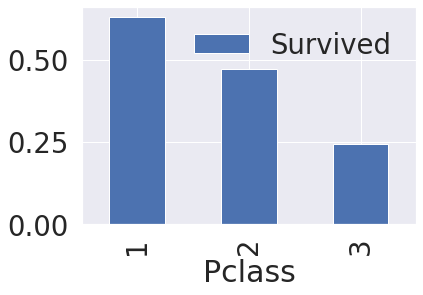

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

보다시피, Pclass가 좋을 수록 생존률이 높은 것을 확인할 수 있다.     
좀더 보기 쉽게 그래프를 그려보겠다. seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해 볼 수 있다.

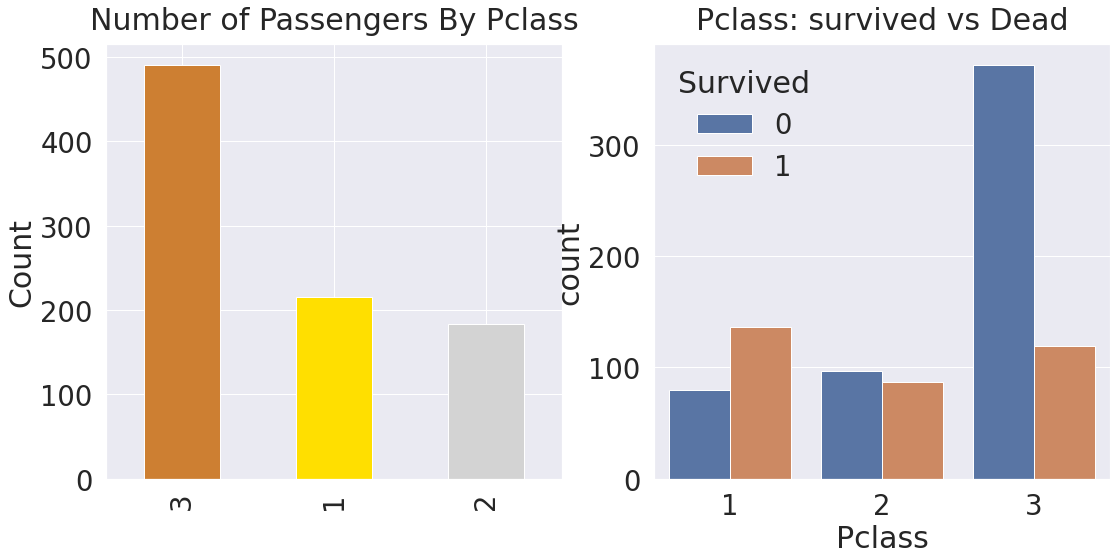

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data= df_train, ax=ax[1])
ax[1].set_title('Pclass: survived vs Dead', y= y_position)
plt.show()

* Pclass가 높을 수록 생존확률이 높은걸 확인 할 수있다.
* 생존에 Pclass가 큰 영향을 미친다고 생각해 볼 수 있으며, 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것이라 판단 할 수 있다.

### 2.2 Sex
* 이번에는 생별로 생존률이 어떻게 달라지는 지 확인 해 보겠다.
* 마찬가지로 pandas groupby와 seaborn countplot을 사용해서 시각화해보겠다

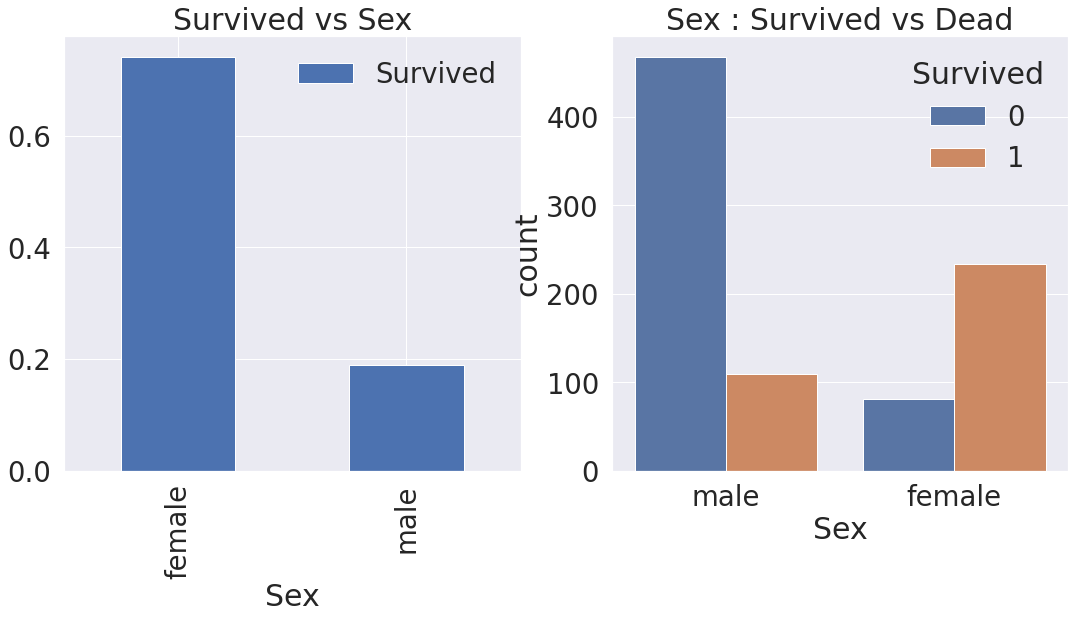

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax= ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

* 여성의 생존률이 높다

In [ ]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')
# margins = True를 주면 All 이 표시되고 합계가 나온다.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Sex,,
female,81,233
male,468,109


* Pclass 와 마찬가지로 , Sex도 예측모델에 쓰일 중요한 feature임을 알 수 있다.

### 2.3 Both Sex and Pclass
* 이번에는 Sex, Pxlass 두가지에 관하여 생종이 어떻게 달라지는지 확인해보겠다
* seavorn의 factorplot을 이용하면 쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있다.

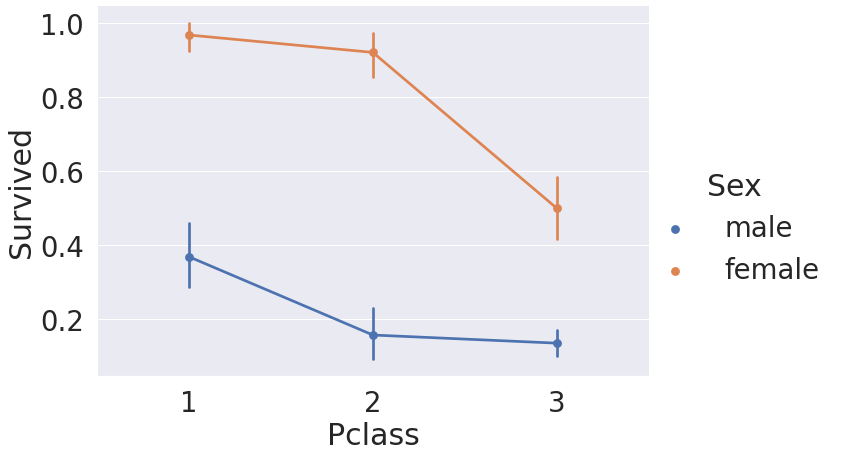

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
# size는 그래프크기, aspect는 가로비율

* 모든 클래스에서 female이 살 확률이 male보다 높다.
* 또한 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높다
* 위 그래프를 hue대신 column으로 하면 아래와 같아진다

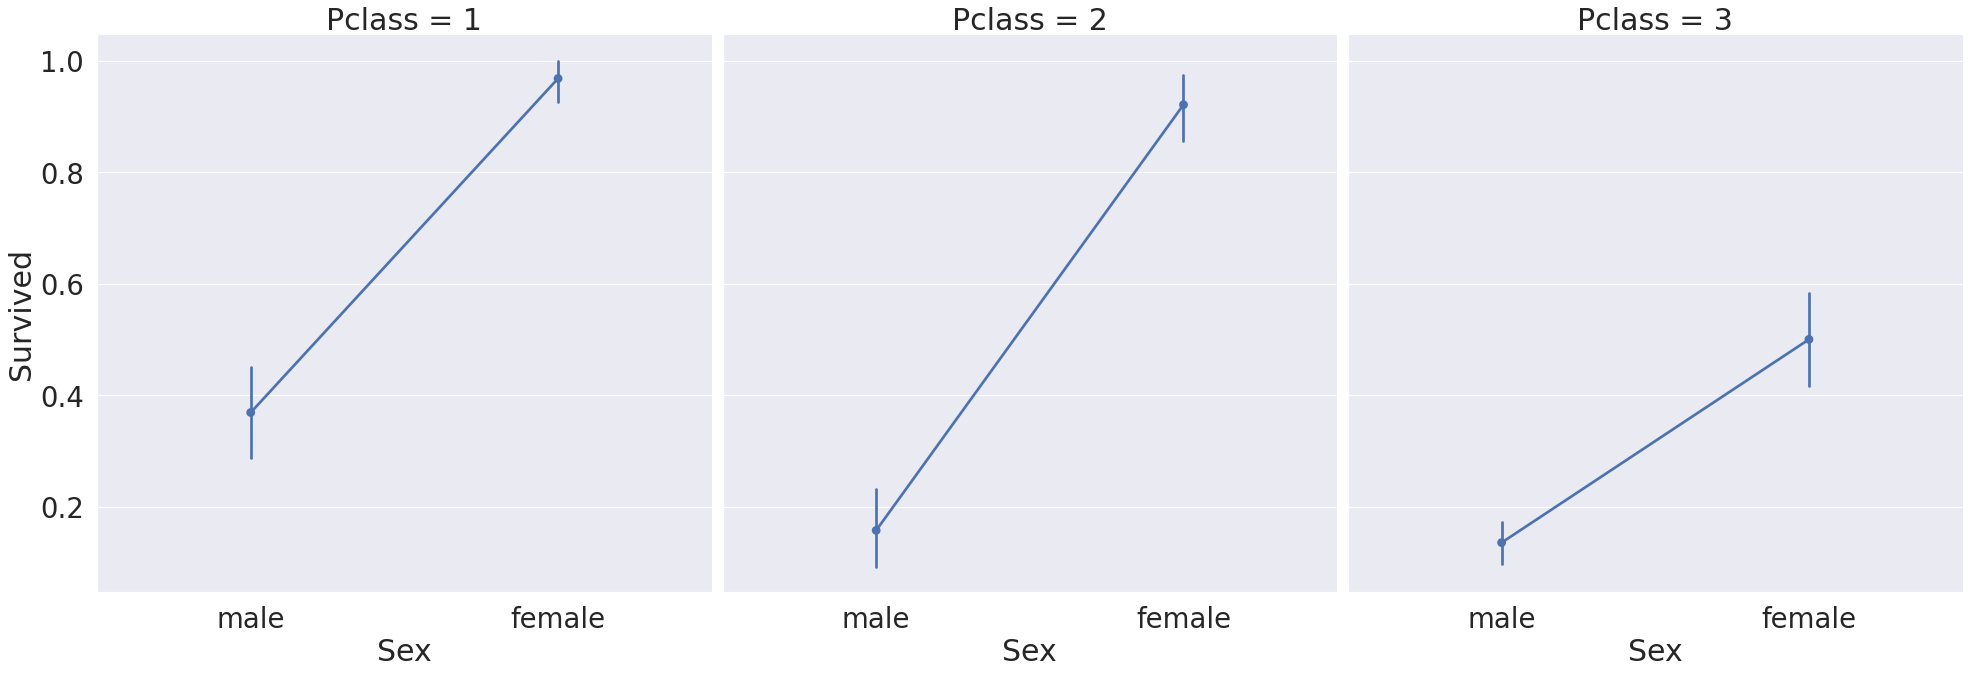

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 2.4 Age
* 이번에는 Age feature를 살펴보겠다

In [ ]:
print('제일 나이가 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객: 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


* 생존에 따른 Age의 histogram을 그려보겠다


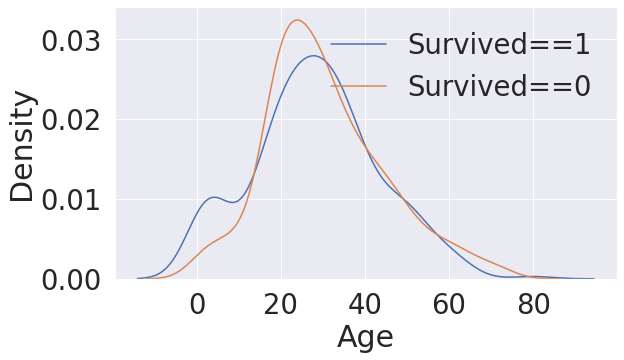

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax= ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

* 보다시피 생존자 중 나이가 어린 경우가 많음을 볼 수있다.

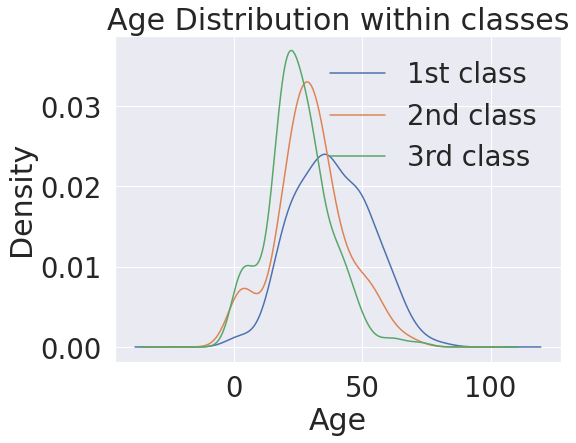

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

* class 가 높을 수록 나이많은 사람의 비중이 커짐
* 나이대가 변하면서 생존률이 어떻게 되는 지 보려고한다
* 나이범위를 점점 넓혀가며, 생존률이 어떻게 되는지 보자

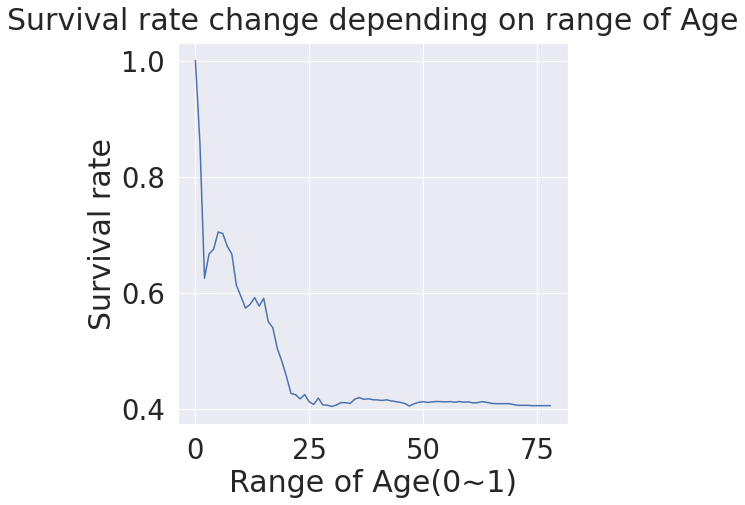

In [ ]:
cummulate_survival_ratio=[]
for i in range(1,80):
  cummulate_survival_ratio.append(
      df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~1)')
plt.show()

* 보다시피 나이가 어릴 수록 생존률이 확실히 높은 것을 볼 수 있다.
* 나이가 중요한 feature로 스일 수 있음을 확인했다

### 2.5 Pclass, Sex, Age
* 지금까지 본, Sex, Pclass, Age, Survived모두에 대해서 보고싶다. 이를 쉽게 그려주는것이 seaborn의 violinplot이다
* x축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex)를 나타내고, y축은 보고싶어하는 distribution(Age)이다


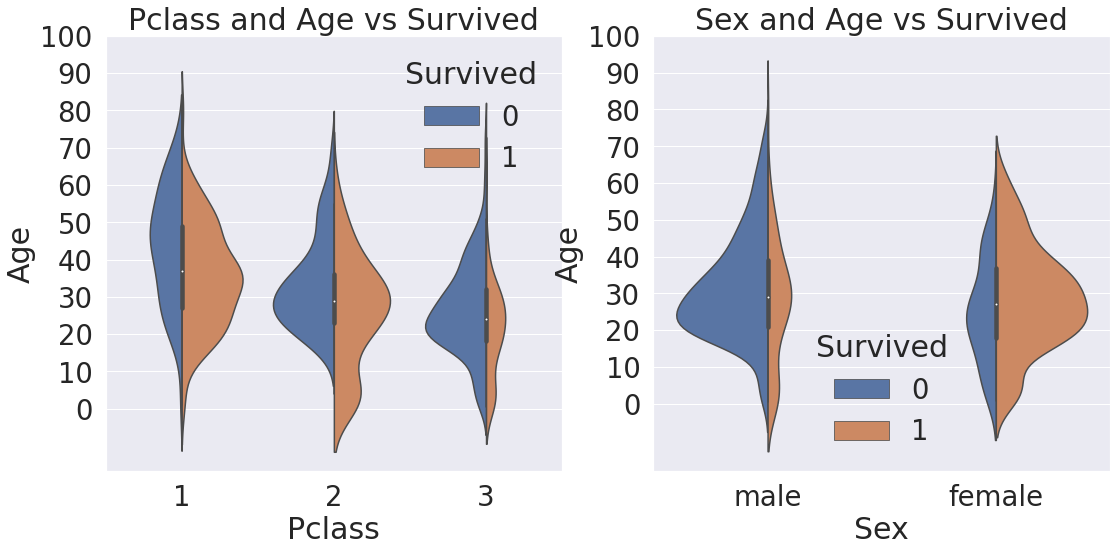

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* 왼쪽그림은 Pclass 별로 Age의 distribution이 어떻게 다른지, 거기에 생존 여부에 따라 구분한 그래프
* 오른쪽 그림도 마찬가리 sex, 생존에따른 distribution이 어떻게 다른지 보여주는 그래프
* 생존만 봤을때 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있다.
* 오른쪽 그림에서 보면, 명확히 여자가 생존을 많이 한 것을 볼 수 있다.
* 여성과 아이를 먼저 챙긴것을 볼 수있다

### 2.6 Embarked
* Embarked는 탑승한 항구를 나타낸다
* 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보겠다

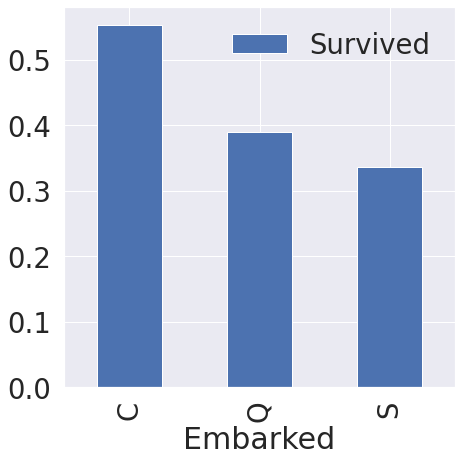

In [ ]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax);

* 조금의 차이는 있지만 생존률은 좀 비슷한 것 같다
* 모델에 얼마나 큰 영향을 미칠지는 모르지만 그래도 사용해 보겠다.
* 사실, 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해 볼 수 있다. 
* 다른 feature로 split하여 한번 살펴보겠다.

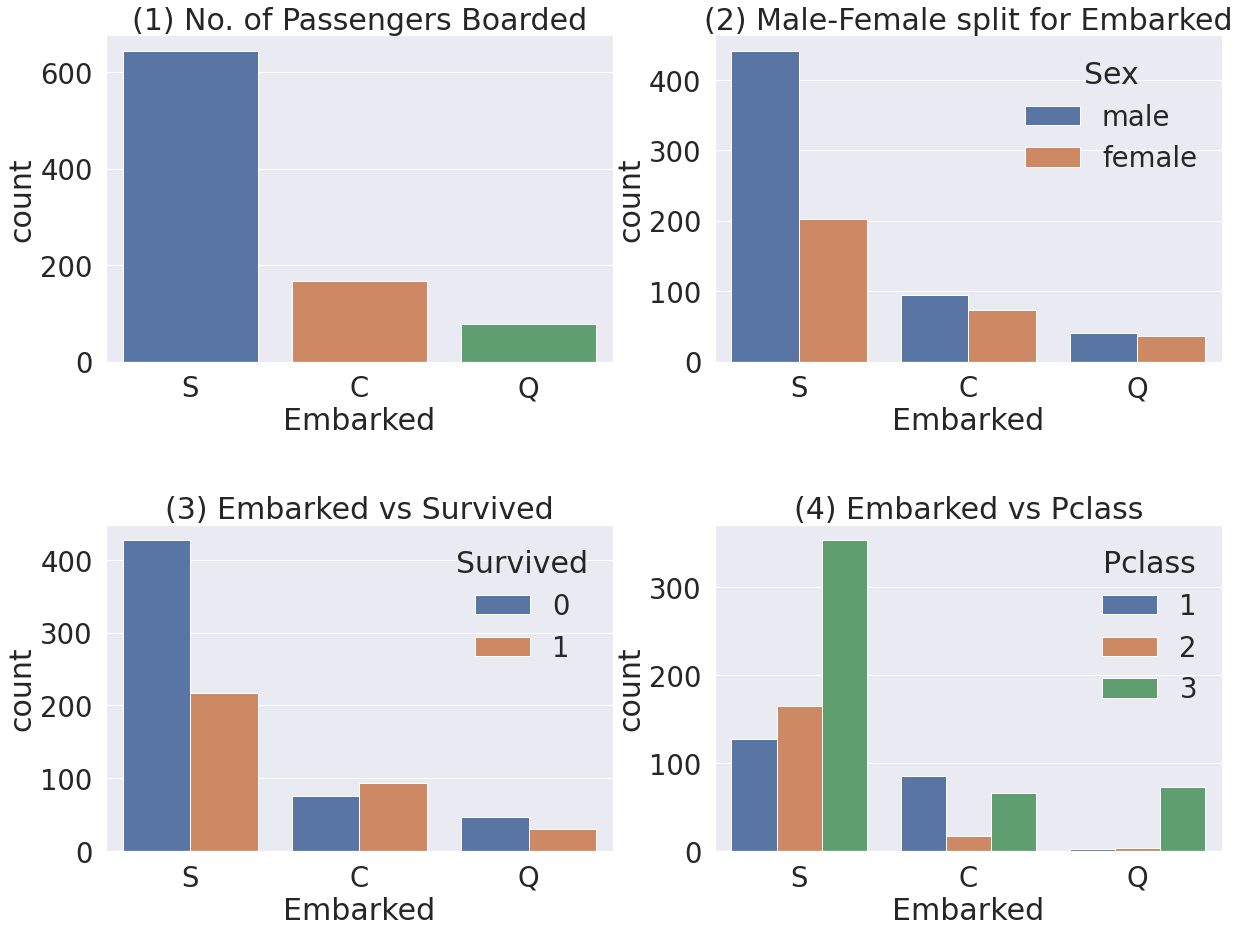

In [ ]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax= ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* figure1 - 전체적으로 봤을때 S 에서 가장 많은 사람이 탑승했다.
* figure12 - C와 Q는 남녀의 비율이 비슷하고 S는 남자가 더 많다
* figure3 - 생존확률이 s 경우 많이 낮은 걸 볼 수 있다.
* figure4 - class로 split 해서 보니, c 가 생존률이 높은건 클래스가 높은 사람이 많이 타서 그렇다.

### 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)
* SibSp와 Parch를 합하면 Family가 될 것이다. Family로 합쳐서 분석해보자

In [ ]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1 더한다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


* FamilySize와 생존 관계를 한번 살펴보자

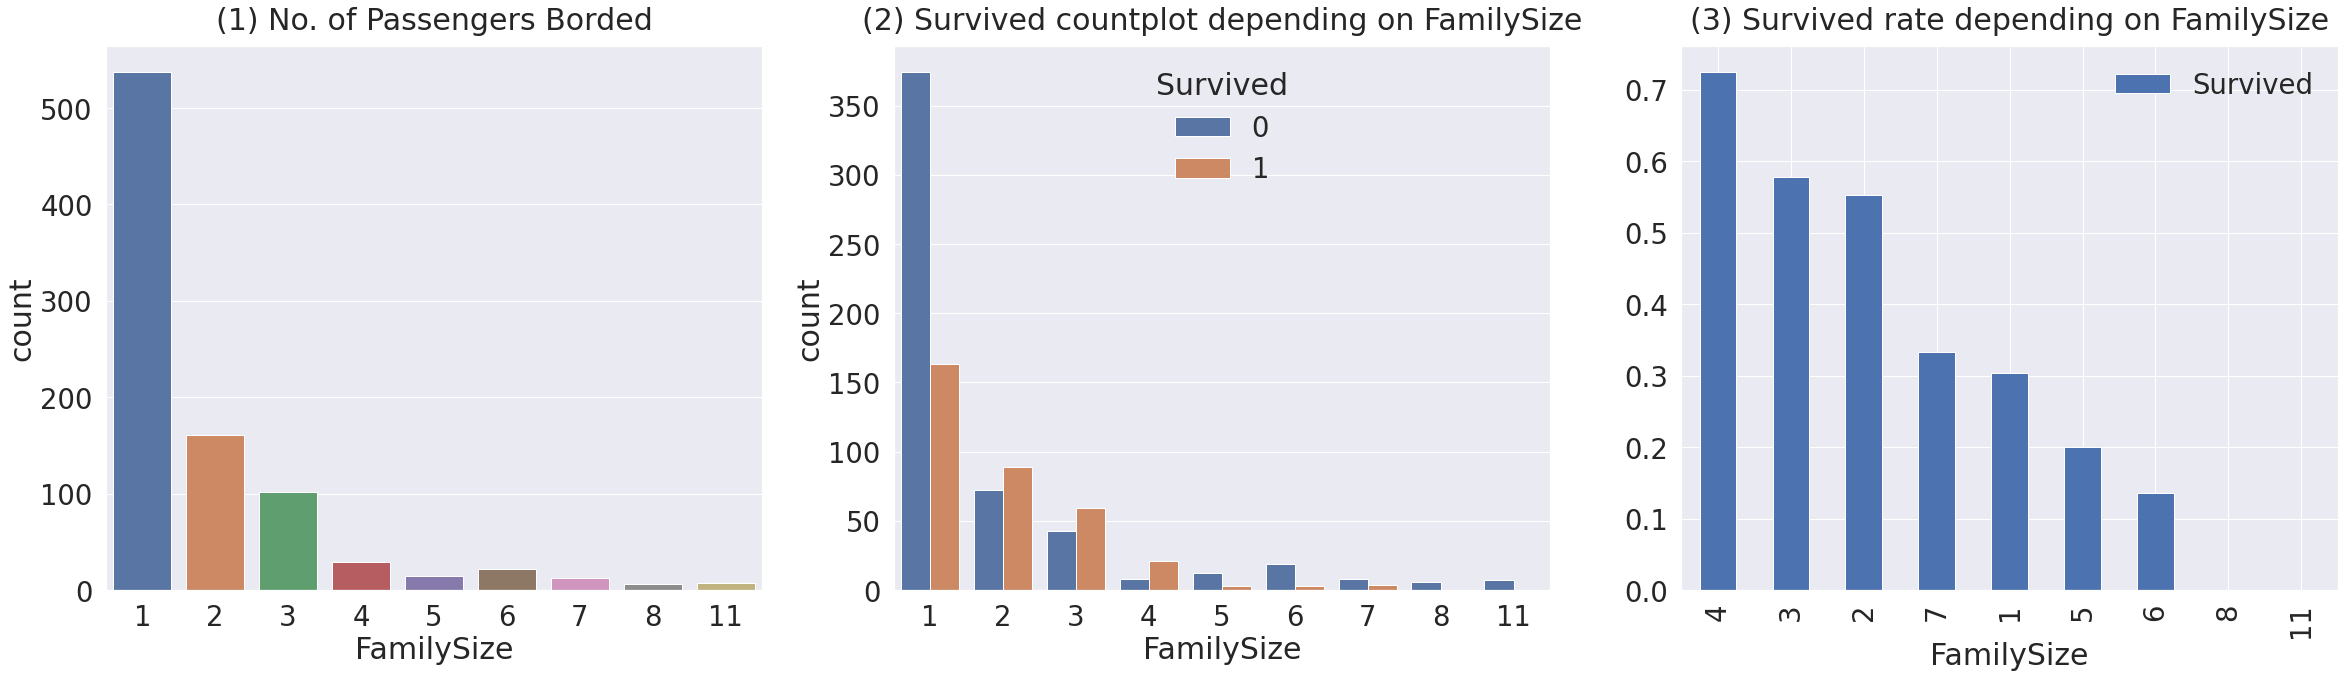

In [ ]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Borded', y=1.02) # y는 그래프와 제목이 얼마나 떨어져 있을지 정한다.

sns.countplot('FamilySize', hue='Survived', data=df_train, ax= ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5) #  서브 플롯 간 간격을 변경
plt.show()

* figure 1 - 가족크기가 1~11까지 있음을 볼 수있다. 대부분 1명이고, 그 다음으로 2, 3, 4 명이다.
* figure 2, 3 - 가족크기에 따른 생존비교, 가족이 4명인 경우가 가장 생존확률이 높다. 가족이 많아질 수록 생존확률이 떨어진다. 가족이 너무 작아도 너무커도 생존확률이 작다. 3 ~ 4 명 선이 생존률이 높은 걸 확인 할 수 있다

### 2.8 Fare
* Fare는 탑승요금이며 , contious feature이다. histogram을 그려보겠다

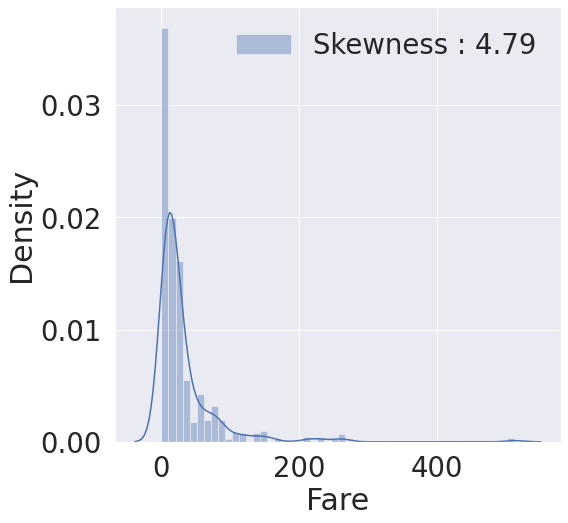

In [ ]:
f, ax = plt.subplots(1,1 , figsize=(8,8))
g= sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g= g.legend(loc='best')

* distribution이 매우 비대칭적인것을 볼 수있다. 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있다. 몇개없는 outlier에 대해서 너무 민감하게 반응 한다면, 실제 예측시에 좋지 못한 결과를 부를 수 있다.
* outlier 의 영향을 줄이기 위해 Fare에 log를 취하겠다. 
* 여기서 우리는 Pandas의 유용한 기능을 사용할 것이다. dataframe의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map 또는 apply를 사용하면 매우 쉽게 적용할 수 있다.
* 우리가 지금 원하는 것은 Fare columns의 데이터 모두를 log값 취하는 것인데 , 파이썬의 간단한 lambda함수를 이용해 로그를 적용하는 함수를 map에 인수로 넣어주면, Fare columns데이터에 그대로 적용된다. 유용한 기능이니 숙지해두는것이좋다

In [ ]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # nan을 평균으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

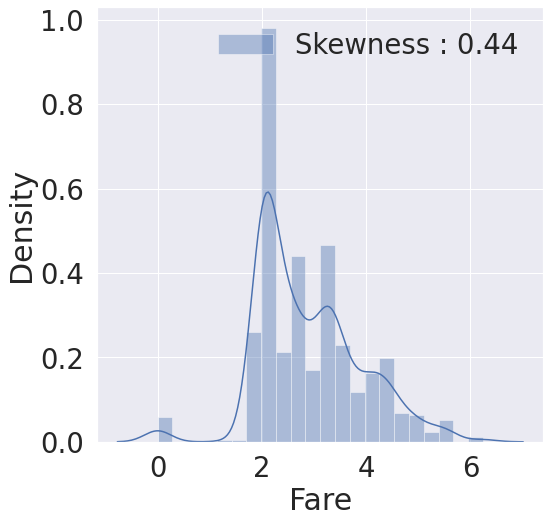

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g= sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax= ax)
g= g.legend(loc='best')

* log를 취하니, 이제 비태칭성이 많이 사라진 것을 볼수있다.
* 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.
* 사실 방금한 것은 feature engineering에 들어가는 부분인데 여기서 했다
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기위해 feature들에 여러 저작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 하는데, 우리는 이제 그것을 보겠다.

### 2.9 Cabin
* 이 feature는 NaN이 대략 80% 이므로 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않다.
* 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠다.

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 Ticket
* 이 feature는 NaN은 없다 . 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요하다

In [ ]:
df_train['Ticket'].value_counts()

347082        7
1601          7
CA. 2343      7
CA 2144       6
347088        6
             ..
PC 17483      1
A/5. 10482    1
226875        1
218629        1
A/5. 13032    1
Name: Ticket, Length: 681, dtype: int64

* Ticket number는 매우 다양하다. 이러한 feature에서 어떤 특징을 끌어내는가가 kaggle의 시작이다. 